Import dependencies and raw data

In [137]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem, ttest_ind,fisher_exact,mannwhitneyu
%matplotlib inline

# read data into dataframe
clinical='clinicaltrial_data.csv'
mouse_model='mouse_drug_data.csv'
clinical_df=pd.read_csv(os.path.join('raw_data',clinical))

mouse_df=pd.read_csv(os.path.join('raw_data',mouse_model))

#merge data by outer to get drug treatment with the clinical data
merge=pd.merge(clinical_df,mouse_df,on='Mouse ID',how='outer')

# merge.head(10)

Plot tumor volume response to different treatment using matplotlib

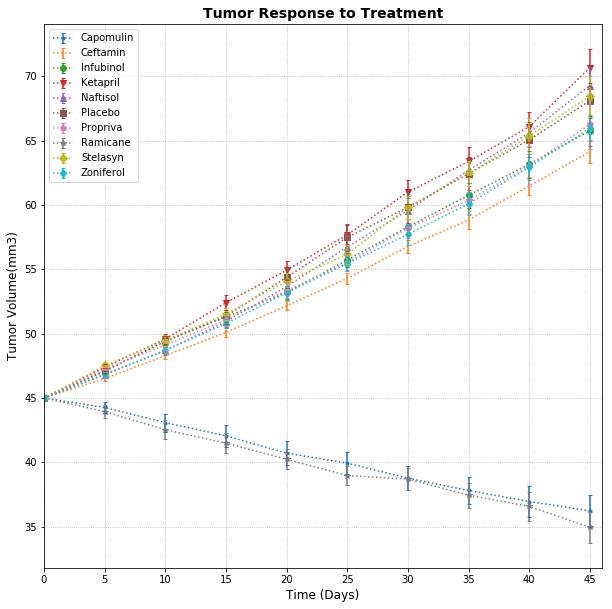

In [139]:
##____________________________________________________________
#Part I: code below is to subset and calculate data needed for plotting
#_____________________________________________________________

#calculate mean of volume size for groupby objects
mean_tumor_volume=merge.groupby(['Timepoint','Drug']).mean().unstack(level='Drug')['Tumor Volume (mm3)']
# print('debug:') 
# mean_tumor_volume

#calculate sem of volume size for groupby objects
sem_tumor_volume=merge.groupby(['Timepoint','Drug']).sem().unstack(level='Drug')['Tumor Volume (mm3)']
# print('debug:') 
# sem_tumor_volume


#____________________________________________________________
#Part II: code below is for plotting
#_____________________________________________________________

#set x_axis
x_axis=np.arange(0,50,5)

#set a marker list 
marker_list=['.', ',', 'o', 'v', '^', 's', 'p', '*','D','d']

#set up a figure with a decent size
fig1=plt.figure(figsize=(10,10))

#set ax1 as add subplot
ax1 = fig1.add_subplot(111)

#use a for loop to extract all the mean for all timepoints for each drug one by one
#use i to access different markers in marker_list
i=0
for drug in mean_tumor_volume.columns:
    ax1.errorbar(x_axis,mean_tumor_volume[drug],yerr=sem_tumor_volume[drug],fmt=marker_list[i],\
                 barsabove=True,capsize=2,linestyle='dotted',label=drug)
    i+=1

#adjust plot properties
plt.legend(loc='upper left')
plt.title('Tumor Response to Treatment',fontsize=14,fontweight='bold')
plt.xlim(min(x_axis),max(x_axis)+1)
plt.xticks(x_axis)
plt.xlabel('Time (Days)',fontsize=12)
plt.ylabel('Tumor Volume(mm3)',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()

Plot the number of metastatic (cancer spreading) sites changes over time

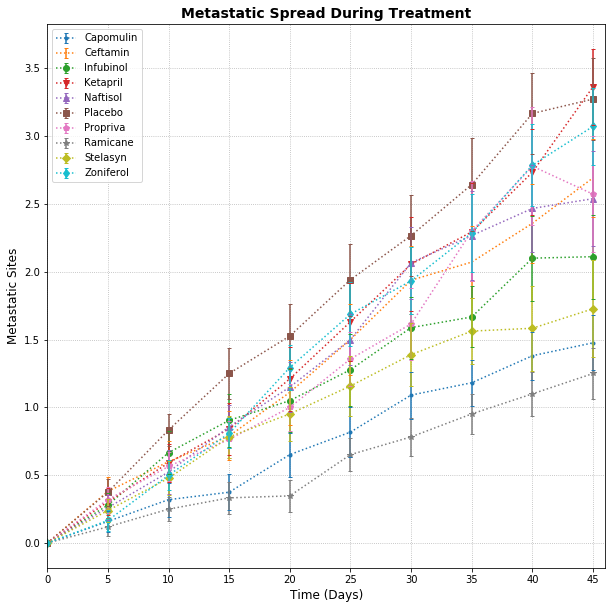

In [140]:
#____________________________________________________________
#Part I: code below is to subset and calculate data needed for plotting
#_____________________________________________________________

#calculate mean of volume size for groupby objects and unstack Drug as columns
mean_sites=merge.groupby(['Timepoint','Drug']).mean().unstack(level='Drug')['Metastatic Sites']
# print('debug:') 
# mean_sites

#calculate sem of volume size for groupby objects
sem_site=merge.groupby(['Timepoint','Drug']).sem().unstack(level='Drug')['Metastatic Sites']
# print('debug:') 
# sem_site

#____________________________________________________________
#Part II: code below is for plotting
#_____________________________________________________________

#x_axis and marker list has been set above already

#set up a figure with a decent size
fig2=plt.figure(figsize=(10,10))

#set ax1 as add subplot
ax2 = fig2.add_subplot(111)

#use a for loop to extract all the mean for all timepoints for each drug one by one
#use i to access different markers in marker_list
i=0
for drug in mean_sites.columns:
    ax2.errorbar(x_axis,mean_sites[drug],yerr=sem_site[drug],fmt=marker_list[i],\
                 barsabove=True,capsize=2,linestyle='dotted',label=drug)
    i+=1

#adjust plot properties
plt.legend(loc='upper left')
plt.title('Metastatic Spread During Treatment',fontsize=14,fontweight='bold')
plt.xlim(min(x_axis),max(x_axis)+1)
plt.xticks(x_axis)
plt.xlabel('Time (Days)',fontsize=12)
plt.ylabel('Metastatic Sites',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()


Plot survival rates of mice with different drug treatment overtime

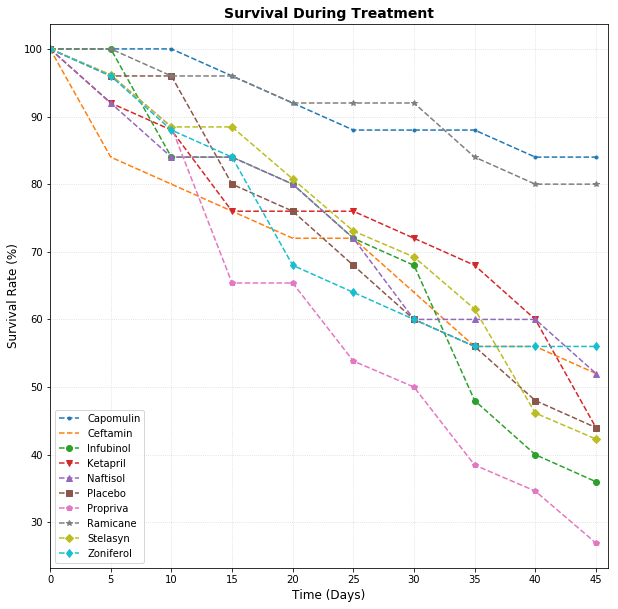

In [141]:
#____________________________________________________________
#Part I: code below is to subset and calculate data needed for plotting
#_____________________________________________________________

#calculate count of mouse for groupby objects
survival_count=merge.groupby(['Timepoint','Drug']).count().unstack(level='Drug')['Mouse ID']
survival_rate=(survival_count.iloc[:,:]/survival_count.iloc[0,:])*100
# # print('debug:') 
# #print(survival_count,survival_rate)

# #____________________________________________________________
# #Part II: code below is for plotting
# #_____________________________________________________________

#x_axis and marker list has been set above already

#set up a figure with a decent size
fig3=plt.figure(figsize=(10,10))

#set ax1 as add subplot
ax3 = fig3.add_subplot(111)

#use a for loop to extract all the mean for all timepoints for each drug one by one
#use i to access different markers in marker_list
i=0
for drug in survival_rate.columns:
    ax3.errorbar(x_axis,survival_rate[drug],marker=marker_list[i],\
                linestyle='--',label=drug)
    i+=1

#adjust plot properties
plt.legend(loc='lower left')
plt.title('Survival During Treatment',fontsize=14,fontweight='bold')
plt.xlim(min(x_axis),max(x_axis)+1)
plt.xticks(x_axis)
plt.xlabel('Time (Days)',fontsize=12)
plt.ylabel('Survival Rate (%)',fontsize=12)
plt.grid(linestyle='dotted',alpha=0.5)
plt.show()

Plot the percentage of tumor volume change in the full 45 days

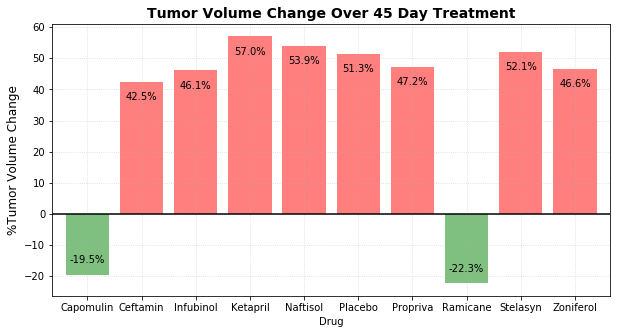

In [142]:
#____________________________________________________________
#Part I: code below is to subset and calculate data needed for plotting
#_____________________________________________________________
#tumor_volume_change=100*(mean tumor volume at day 45 for each drug-the corresponding mean volume at day 0)/the corresponding mean volume at day 0
tumor_volume_change_percentage=(100*(mean_tumor_volume.iloc[9,:]-mean_tumor_volume.iloc[0,:])/\
                                mean_tumor_volume.iloc[0,:])

#____________________________________________________________
#Part II:Plotting
#_____________________________________________________________
#Set up a function _color_list_ to assign green color to negative values and red color to positive values
#_color_list_ takes pd.seires and return a list of colors 
def _color_list_(series):
    color_list=[]
    for value in series.values:
        if value<0:
            color_list.append('g')
        else:
            color_list.append('r')
    return color_list

#plot a figure and set a resonable figure size
plt.figure(figsize=(10,5))

#pass tumor_volume_change_percentage to _color_list_ function and get a color_list
color_list=_color_list_(tumor_volume_change_percentage)

#plot the bar graph with corresponding color and other properties
ax4 = tumor_volume_change_percentage.plot(kind='bar',color=color_list,alpha=0.5,width=0.8)

#change the x_tick label rotation to 0 (somehow the default is 90 degree)
for tick in ax4.get_xticklabels():
    tick.set_rotation(0)
    
#plot a horizontal line spanning the entire xaxis at y=0 
plt.axhline(y=0,color='k')

#get label, grid,titles
ax4.set_ylabel('%Tumor Volume Change',fontsize=12)
plt.grid(linestyle='dotted',alpha=0.5)
ax4.set_title("Tumor Volume Change Over 45 Day Treatment",fontsize=14,fontweight='bold')

#____________________________________________________________
#Part II:Adding values at each bar
#_____________________________________________________________

#initiate a rects list for each rectangle from the bar graph
rects = ax4.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    # Number of points between bar and label. 
    #I want to place the label inside the bar so I set it up to a negative number
    space = -20
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}%".format(y_value)
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va) 

plt.show()

In [143]:
#Code in this cells is to calculate statistics and create a p-value dataframe to back up my major conclusions
#____________________________________________________________
#PartI First question to answer:
#Which drug treatment significantly reduce the tumor volume by Day45 compared to the control(placebo) group?
#since the tumor volume size all start at the magic volume 45(mm3) for all mice examined, 
#it is the ok to just compare the final Tumor Volume size at day 45. In a real world, the best comparison would be
#Tumor volume size at day 45-Tumor Volume size at day0 for each mouse
#____________________________________________________________

#get a drug_list including all the drugs names including the placebo
drug_list_exp=list(merge['Drug'].unique())

#remove 'Placebo' from the list
drug_list_exp.remove('Placebo')

#create list to store the Tumor Volume Data at Day45 of all drug groups (note placebo is removed)
exp_volume_45=[merge.loc[(merge['Drug']==i)&(merge['Timepoint']==45),['Tumor Volume (mm3)']] for i in drug_list_exp]

#subset the Tumor Volume Data at Day45 for the placebo group
control_volume_45=merge.loc[(merge['Drug']=='Placebo')&(merge['Timepoint']==45),['Tumor Volume (mm3)']]

#create a list to store the p-values of each compairson between drug vs.control
p_values_volumes=[ttest_ind(i,control_volume_45,equal_var=False)[1][0] for i in exp_volume_45]

#____________________________________________________________
#PartII Second question to answer:
#Which drug treatment significantly increases the chance of survival for mice by the end of treatment?
#This requres a fisher's exact test (a Chi-square test of independence of variables in a 2x2 contingency table)
#Data should be compared in the following format:
# _by DAY45
#_________________________________________            
#       living Mouse       Dead Mouse
#Placebo    counts          counts
#Drug      counts           counts
#____________________________________________________

#This can answer if Drug treatment significantly increase/decrease the odds for mouse to survive 
#compared to the place group
#_______________________________________________________
#I have previousely create a dataframe called survival_count to 
#count the number of mouse at each timpoint treated by each drug called
# survival_count

#format a list to store placebo=[living mouse,dead mouse] at day45
placebo_surv=[survival_count.loc[45,'Placebo'],(survival_count.loc[0,'Placebo']-survival_count.loc[45,'Placebo'])]

#format a nested list to store living and dead mouse for each drug by day 45
#drug_surv=[[living mouse,dead mouse for dug1],[living mosue, dead mouse for drug2]..]
drug_surv=[[survival_count.loc[45,i],(survival_count.loc[0,i]-survival_count.loc[45,i])] for i in drug_list_exp]

#create a list to store the two-tailed p-values of each compairson between drug vs.control
p_values_survival=[fisher_exact([i,placebo_surv],'two-sided')[1] for i in drug_surv]


#____________________________________________________________
#PartIII Third question to answer:
#Which drug treatment significantly reduces the tumor metastasis by the end of the treatment?

#One clarification here: 
#the 'Metastatic Sites' in the original file does not mean the number of sites tumor has spread
# The metastatic sites value range 0-4 because the metastatic state is defined as 0 to 4 stages, the higher the 
#stage is the more severe or spreaded tumors are.
#So there are two  ways to do statistics in this case: 
#one way is to perform a chi-square test to assese by day45 the distribution of Metastatic Stages of living mouse 
#between each drug to the placebo group;another way is to take advantage of the numeric value assigned to the metastic 
#stage and perform a Mann–Whitney U test to compare if at day45 the Metastatic Stages value in the drug group 
# is significantly lower than placebo group. Note t.test should not be used because the metastic stages values are 
# discontinous numbers and the distribution intrinsically is nonparametric. 

#I decide to use Mann-Whitney test since Chi-square is similar to the 
#Fisher's exact test which I have performed with already

#format a list to store placebo_metas=[stage0,stage1,stage2,stage3,stage4] at day45

#get the data series of placebo metastatic values
placebo_met_values=merge.loc[(merge['Drug']=='Placebo')&(merge['Timepoint']==45),:]['Metastatic Sites'].values

#store the data series of drug metastatic values
drug_met_values=[merge.loc[(merge['Drug']==i)&(merge['Timepoint']==45),:]['Metastatic Sites'].values for i in drug_list_exp]

#store the p_values of Mann-Whitney test between each drug to the placebo
p_values_met=[mannwhitneyu(placebo_met_values,i,alternative='two-sided')[1] for i in drug_met_values]

#____________________________________________________________
#PartIV Make a dataframe of all the states combined
p_statistics_df=pd.DataFrame({'Drug':drug_list_exp,'p_value(Tumor Volume,t-test,two-tailed)':p_values_volumes,\
                             "p_value(Survival, Fisher's exact test,two-tailed)":p_values_survival,\
                             'p_value(Metastasis, Mann-Whitney test,two-tailed)':p_values_met})
p_statistics_df


,Drug,"p_value(Metastasis, Mann-Whitney test,two-tailed)","p_value(Survival, Fisher's exact test,two-tailed)","p_value(Tumor Volume,t-test,two-tailed)"
0,Capomulin,0.000247,0.007150,1.926035e-15
1,Ketapril,0.823846,1.000000,2.086631e-01
2,Naftisol,0.151835,0.777512,5.524101e-01
3,Infubinol,0.015758,0.773287,2.051593e-01
4,Stelasyn,0.007311,1.000000,8.663134e-01
5,Ramicane,0.000095,0.018628,1.019818e-15
6,Propriva,0.195385,0.249161,4.472732e-01
7,Zoniferol,0.676626,0.572138,2.221336e-01
8,Ceftamin,0.111860,0.777512,2.575430e-02
